# LAB-22 DataFrame Merge & Drill Down

1. 由 Jupyter 檢查套件是否已安裝
2. 設定 Pandas 顯示資料的欄位數及筆數
3. 檢查合併的 KEY 是否重複
4. 合併資料集
5. IPyWidgets人機界面元件
6. Drill Down
7. 使用自訂外部模組

## 檢查套件是否已安裝

In [1]:
# 檢查套件是否已安裝，若未安裝，則回到命令列貨 Console 執行 conda install 
!conda list "panda|numpy|openpyxl|ipywidgets" 

# packages in environment at /opt/homebrew/Caskroom/miniforge/base/envs/python-dev:
#
# Name                    Version                   Build  Channel
ipywidgets                8.1.5              pyhd8ed1ab_1    conda-forge
numpy                     2.2.3           py313h41a2e72_0    conda-forge
openpyxl                  3.1.5           py313h90caf49_1    conda-forge
pandas                    2.2.3           py313h47b39a6_1    conda-forge


In [2]:
import pandas as pd
import numpy as np 
import ipywidgets as widgets
from IPython.display import display

## 設定 Pandas 顯示設定
最大欄位數： 100
最大資料列數： 100

In [3]:
# Pandas 顯示設定

# 設定最大顯示的欄位數
# None 為 全部(不設限)
pd.set_option('display.max_columns', 100)  # 設定最多顯示 100 個欄位

# 設定最大顯示的資料列數
pd.set_option('display.max_rows', 100)  # 設定最多顯示 100 筆資料

## 讀取 2024立法立法委員.csv 

In [4]:
# 讀取立法政治獻金
# 使用已經資料清理的檔案 lab-19.csv
#csvf = "2024立法委員.csv"
csvf = "lab-19.csv"
df1 = pd.read_csv(csvf, low_memory=False)

df1.shape

(188566, 15)

In [5]:
df1.head(5).T

,0,1,2,3,4
候選人,林岱樺,林岱樺,林岱樺,林岱樺,林岱樺
選舉名稱,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉
收支科目,個人捐贈收入,個人捐贈收入,個人捐贈收入,個人捐贈收入,個人捐贈收入
對象,蔡韻秋,王信宗,張寶仁,袁新民,邱明正
ID,NaN,NaN,NaN,NaN,T12*******
收入金額,10000.0,10000.0,10000.0,10000.0,10000.0
支出金額,0.0,0.0,0.0,0.0,0.0
支出用途,NaN,NaN,NaN,NaN,NaN
金錢類,金錢,金錢,金錢,金錢,金錢
捐贈方式,匯款,匯款,匯款,匯款,匯款


## 讀取 2024立法委員選舉結果清冊 XLSX

In [6]:
#xlsx = "2024立委選舉結果清冊.xlsx"
xlsx = "lab-22.xlsx"
df2 = pd.read_excel(xlsx)
df2.shape

(328, 9)

In [7]:
df2.head()

,縣市區,候選人,性別,政黨,得票數,當選,生日,年齡,年齡區間
0,宜蘭縣,陳俊宇,男,民主進步黨,107308,是,1975-03-14,48,40-50
1,宜蘭縣,林錦坤,男,無,1754,否,1964-12-06,59,50-60
2,宜蘭縣,邱介勲,男,制度救世島,647,否,1954-04-28,69,60-70
3,宜蘭縣,陳琬惠,女,台灣民眾黨,53499,否,1974-09-11,49,40-50
4,宜蘭縣,林意評,男,台灣基進,6201,否,1989-03-04,34,30-40


## 檢查 KEY(姓名)是否重複

In [8]:
# 只能用 姓名 為 KEY 
# 檢查是否有重複
df2[df2.duplicated(subset=['候選人'],keep=False)]

,縣市區,候選人,性別,政黨,得票數,當選,生日,年齡,年齡區間


## 合併資料集

In [9]:
## 使用 merge left-join 
## 保留 df1
df = pd.merge(df1, df2, on='候選人', how='left')
df.head(5).T

,0,1,2,3,4
候選人,林岱樺,林岱樺,林岱樺,林岱樺,林岱樺
選舉名稱,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉
收支科目,個人捐贈收入,個人捐贈收入,個人捐贈收入,個人捐贈收入,個人捐贈收入
對象,蔡韻秋,王信宗,張寶仁,袁新民,邱明正
ID,NaN,NaN,NaN,NaN,T12*******
收入金額,10000.0,10000.0,10000.0,10000.0,10000.0
支出金額,0.0,0.0,0.0,0.0,0.0
支出用途,NaN,NaN,NaN,NaN,NaN
金錢類,金錢,金錢,金錢,金錢,金錢
捐贈方式,匯款,匯款,匯款,匯款,匯款


In [10]:
df.tail(5).T

,188561,188562,188563,188564,188565
候選人,牛煦庭,牛煦庭,牛煦庭,牛煦庭,牛煦庭
選舉名稱,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉,113年立法委員選舉
收支科目,個人捐贈收入,個人捐贈收入,個人捐贈收入,個人捐贈收入,個人捐贈收入
對象,李明華,林賈梅珍,磨佩伶,林明華,廖世媚
ID,H12*******,D22*******,F22*******,H12*******,U22*******
收入金額,1000.0,5000.0,500.0,500.0,500.0
支出金額,0.0,0.0,0.0,0.0,0.0
支出用途,NaN,NaN,NaN,NaN,NaN
金錢類,金錢,金錢,金錢,金錢,金錢
捐贈方式,現金,現金,現金,現金,現金


## 班佛定律模組
1. `beford_dist()`： 回傳班佛定律的理論值
2. `benford_init()`：依傳入類別(`list`)，建立一個長度為10的整數陣列，以儲存 0-9 數字的累計
3. `benford_first_digit()`：取的左邊第一個數字，並累計
4. `benford_calc()`：計算各數字的分布

**執行方式(範例)：**
```python
cate = ['A','B','C']   
benford = benford_init(cate)      # 依類別 [A,B,C] 產生 0-9 的陣列，以儲存第一個數字的計數

for d in data:
    benford_first_digit(befird, d.name, d.val)   # d.name in [A,B,C] , d.val 班佛定律計算的數值

result = benford_calc(benford)

```

### benford_dist 班佛定律的理論值

In [11]:
# Benford's Law 預期的第一個數字分佈
# 作為繪圖的基礎線
def benford_dist():
    return [np.log10(1 + 1 / d) for d in range(1, 10)]


### benford_init 初始化，以用後於續計算

In [12]:
# 依傳入的類別
# 建立一個長度為10的整數陣列
# 儲存 0-9 數字的累計
def benford_init(cate):
    bf_data = {}
    for c in cate:
        bf_data[c] = np.zeros(10,dtype=int)    

    return bf_data


### benford_first_digit 統計第一個數字的計數

In [13]:
# 統計第一個數字的計數
def benford_first_digit(result, name, amt_val):
    #print(name,amt_val)
    d = int(str(abs(amt_val))[0])                    # 負數取絕對值
    
    result[name][d] += 1    
    

### benford_calc 計算數字的分布

In [14]:
# 計算分佈
def benford_calc(data):
    result = {}
    for name in data.keys():
        result[name] = np.zeros(10,dtype=float)
        sub_total = np.sum(data[name][1:10])
        for i in range(1,10):
            result[name][i] = data[name][i]/sub_total
    return result 


In [15]:
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# 繪圖中文字型
# 設定中文字型
# 依不同平台 (Windows/Mac) 需設定不同中文字型
def set_chinese_font():
    if sys.platform == "win32":
        # Windows 
        plt.rcParams['font.family'] = 'Microsoft JhengHei'
    elif sys.platform == "darwin":
        plt.rcParams['font.family'] = 'Heiti TC' 
    else:
        assert "未知作業系統"

In [17]:
def plot_benford(result):
    
    set_chinese_font()
    
    # 繪圖
    digits = range(1, 10)

    for n in result.keys():
        plt.plot(digits, result[n][1:10], label=n)
        
    plt.plot(digits, benford_dist(), label="班佛定律", color='red',linestyle='-',marker='o')
    
    plt.xlabel('數字')
    plt.ylabel('分佈')
    plt.title("班佛定律分佈")
    plt.legend()
    plt.grid(True)
    plt.show()

## 執行班佛定律分析

### 依「政黨」

In [18]:

# "台灣民眾黨","時代力量","新黨" 候選人較少，先排除
party = ["中國國民黨","民主進步黨"]
benford = benford_init(party)

df3 = df[(df["收支"]=="支出") & (df["政黨"].isin(party))]

df3.apply(lambda row : benford_first_digit(benford, row["政黨"],row["支出金額"]), axis = 1)

res = benford_calc(benford)

In [19]:
res

{'中國國民黨': array([0.        , 0.33933817, 0.15938722, 0.12755833, 0.08439146,
        0.07623395, 0.07035859, 0.04627449, 0.04952779, 0.04693001]),
 '民主進步黨': array([0.        , 0.32812526, 0.16324782, 0.12218806, 0.08594997,
        0.08961242, 0.06157284, 0.0515431 , 0.04855266, 0.04920787])}

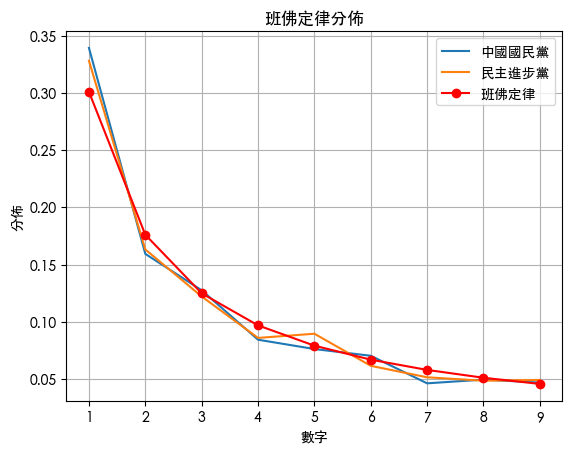

In [20]:
plot_benford(res)

### 依「收支科目」

In [21]:
# 以收支科目

benford = benford_init(df3["收支科目"].unique())

df3.apply(lambda row : benford_first_digit(benford, row["收支科目"],row["支出金額"]), axis = 1)

res = benford_calc(benford)

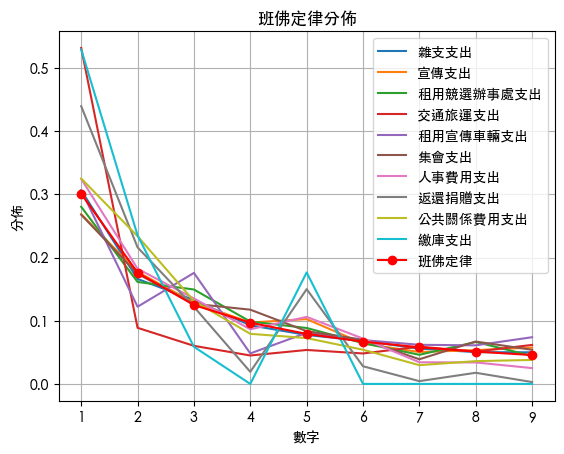

In [22]:
plot_benford(res)

In [23]:
# 檢視 res 內容
res

{'雜支支出': array([0.        , 0.30637334, 0.1661648 , 0.1327427 , 0.09280044,
        0.07749546, 0.06818804, 0.05589428, 0.05034467, 0.04999627]),
 '宣傳支出': array([0.        , 0.26877057, 0.1773108 , 0.12870176, 0.09714328,
        0.10260245, 0.06401436, 0.05040383, 0.05354472, 0.05750823]),
 '租用競選辦事處支出': array([0.        , 0.2804428 , 0.16143911, 0.14944649, 0.09870849,
        0.08856089, 0.06457565, 0.04612546, 0.06642066, 0.04428044]),
 '交通旅運支出': array([0.        , 0.53189871, 0.08881454, 0.0602996 , 0.04501559,
        0.05376017, 0.04820926, 0.05900692, 0.05125086, 0.06174435]),
 '租用宣傳車輛支出': array([0.        , 0.30655509, 0.12217573, 0.17573222, 0.04825662,
        0.08089261, 0.06945607, 0.06192469, 0.06108787, 0.07391911]),
 '集會支出': array([0.        , 0.26789741, 0.17418264, 0.12683202, 0.117531  ,
        0.08356821, 0.06989853, 0.03903608, 0.06708005, 0.05397407]),
 '人事費用支出': array([0.        , 0.32466638, 0.18237662, 0.13524677, 0.08652828,
        0.10612158, 0.07175387, 0.0

In [24]:
# 轉換為 DataFrame 
res_df = pd.DataFrame()

for name in res.keys():
    data = { "1" : res[name][1],
             "2" : res[name][2],
             "3" : res[name][3],
             "4" : res[name][4],
             "5" : res[name][5],
             "6" : res[name][6],
             "7" : res[name][7],
             "8" : res[name][8],
             "9" : res[name][9],}
    
    row = pd.DataFrame([data], index=[name])
    res_df = pd.concat([res_df, row])
    
res_df

,1,2,3,4,5,6,7,8,9
雜支支出,0.306373,0.166165,0.132743,0.092800,0.077495,0.068188,0.055894,0.050345,0.049996
宣傳支出,0.268771,0.177311,0.128702,0.097143,0.102602,0.064014,0.050404,0.053545,0.057508
租用競選辦事處支出,0.280443,0.161439,0.149446,0.098708,0.088561,0.064576,0.046125,0.066421,0.044280
交通旅運支出,0.531899,0.088815,0.060300,0.045016,0.053760,0.048209,0.059007,0.051251,0.061744
租用宣傳車輛支出,0.306555,0.122176,0.175732,0.048257,0.080893,0.069456,0.061925,0.061088,0.073919
集會支出,0.267897,0.174183,0.126832,0.117531,0.083568,0.069899,0.039036,0.067080,0.053974
人事費用支出,0.324666,0.182377,0.135247,0.086528,0.106122,0.071754,0.034262,0.033997,0.025048
返還捐贈支出,0.439706,0.216176,0.122059,0.019118,0.150000,0.027941,0.004412,0.017647,0.002941
公共關係費用支出,0.325188,0.233835,0.131203,0.079323,0.072556,0.054135,0.029699,0.036090,0.037970
繳庫支出,0.529412,0.235294,0.058824,0.000000,0.176471,0.000000,0.000000,0.000000,0.000000


### 統計與理論值的誤差

In [25]:
# 看圖，數字 1 需 drill-down

# 取得 標準值
expected = benford_dist()

print(f"Benford;s Low [1] = {expected[0]:.4f}")

# 計算誤差
res_df["誤差"] = abs(res_df["1"] - expected[0]) / expected[0] * 100

res_df

Benford;s Low [1] = 0.3010


,1,2,3,4,5,6,7,8,9,誤差
雜支支出,0.306373,0.166165,0.132743,0.092800,0.077495,0.068188,0.055894,0.050345,0.049996,1.775021
宣傳支出,0.268771,0.177311,0.128702,0.097143,0.102602,0.064014,0.050404,0.053545,0.057508,10.716351
租用競選辦事處支出,0.280443,0.161439,0.149446,0.098708,0.088561,0.064576,0.046125,0.066421,0.044280,6.838917
交通旅運支出,0.531899,0.088815,0.060300,0.045016,0.053760,0.048209,0.059007,0.051251,0.061744,76.692928
租用宣傳車輛支出,0.306555,0.122176,0.175732,0.048257,0.080893,0.069456,0.061925,0.061088,0.073919,1.835397
集會支出,0.267897,0.174183,0.126832,0.117531,0.083568,0.069899,0.039036,0.067080,0.053974,11.006408
人事費用支出,0.324666,0.182377,0.135247,0.086528,0.106122,0.071754,0.034262,0.033997,0.025048,7.851838
返還捐贈支出,0.439706,0.216176,0.122059,0.019118,0.150000,0.027941,0.004412,0.017647,0.002941,46.067132
公共關係費用支出,0.325188,0.233835,0.131203,0.079323,0.072556,0.054135,0.029699,0.036090,0.037970,8.025105
繳庫支出,0.529412,0.235294,0.058824,0.000000,0.176471,0.000000,0.000000,0.000000,0.000000,75.866781


In [26]:
# 以誤差值排序
res_df.sort_values("誤差", ascending = False)

# 需要 drill-down 的有 交通旅運支出
# 排除繳庫支出、返還捐贈支出

,1,2,3,4,5,6,7,8,9,誤差
交通旅運支出,0.531899,0.088815,0.060300,0.045016,0.053760,0.048209,0.059007,0.051251,0.061744,76.692928
繳庫支出,0.529412,0.235294,0.058824,0.000000,0.176471,0.000000,0.000000,0.000000,0.000000,75.866781
返還捐贈支出,0.439706,0.216176,0.122059,0.019118,0.150000,0.027941,0.004412,0.017647,0.002941,46.067132
集會支出,0.267897,0.174183,0.126832,0.117531,0.083568,0.069899,0.039036,0.067080,0.053974,11.006408
宣傳支出,0.268771,0.177311,0.128702,0.097143,0.102602,0.064014,0.050404,0.053545,0.057508,10.716351
公共關係費用支出,0.325188,0.233835,0.131203,0.079323,0.072556,0.054135,0.029699,0.036090,0.037970,8.025105
人事費用支出,0.324666,0.182377,0.135247,0.086528,0.106122,0.071754,0.034262,0.033997,0.025048,7.851838
租用競選辦事處支出,0.280443,0.161439,0.149446,0.098708,0.088561,0.064576,0.046125,0.066421,0.044280,6.838917
租用宣傳車輛支出,0.306555,0.122176,0.175732,0.048257,0.080893,0.069456,0.061925,0.061088,0.073919,1.835397
雜支支出,0.306373,0.166165,0.132743,0.092800,0.077495,0.068188,0.055894,0.050345,0.049996,1.775021


### Drill Down 「交通旅運支出」

In [27]:
# 僅看 交通旅運支出
df4 = df3[df3["收支科目"]=="交通旅運支出"]

# 保留必要欄位
df4 = df4[["候選人","收支科目","對象","支出金額","支出用途","政黨"]]
df4.head(10)

,候選人,收支科目,對象,支出金額,支出用途,政黨
43,林岱樺,交通旅運支出,歐特儀股份有限公司,90.0,停車費,民主進步黨
125,林岱樺,交通旅運支出,計程車,740.0,搭乘交通工具費用,民主進步黨
188,林岱樺,交通旅運支出,高雄捷運,999.0,搭乘交通工具費用,民主進步黨
199,林岱樺,交通旅運支出,嘟嘟房,400.0,停車費,民主進步黨
393,林岱樺,交通旅運支出,歐特儀股份有限公司,45.0,停車費,民主進步黨
438,林岱樺,交通旅運支出,台灣高鐵,5275.0,搭乘交通工具費用,民主進步黨
484,林岱樺,交通旅運支出,台灣高鐵,1580.0,搭乘交通工具費用,民主進步黨
503,林岱樺,交通旅運支出,台灣高鐵,4710.0,搭乘交通工具費用,民主進步黨
534,林岱樺,交通旅運支出,台灣高鐵,2890.0,搭乘交通工具費用,民主進步黨
632,林岱樺,交通旅運支出,台灣高鐵,24525.0,月高鐵票,民主進步黨


In [28]:
# 以政黨統計
benford = benford_init(df4["政黨"].unique())

df4.apply(lambda row : benford_first_digit(benford, row["政黨"],row["支出金額"]), axis = 1)

res = benford_calc(benford)

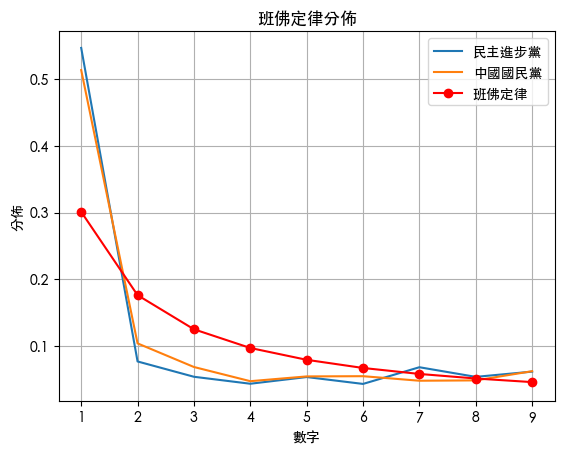

In [29]:
plot_benford(res)

### 個案01：依金額區間及整數整除與否

In [30]:
# 依照金額及數字整數 100 
def analyze_case_01(amt_min, amt_max, divided):    
    data = df4[(df4["支出金額"]>=amt_min) & (df4["支出金額"]<=amt_max) & (df4["支出金額"] % divided == 0)]
    
    return data.copy()
    

In [31]:
df5 = analyze_case_01(1,1000,100)
df5.head(5)

,候選人,收支科目,對象,支出金額,支出用途,政黨
199,林岱樺,交通旅運支出,嘟嘟房,400.0,停車費,民主進步黨
1025,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處草屯加油站,500.0,油資,中國國民黨
1028,馬文君,交通旅運支出,台灣真工國際股份有限公司,400.0,油資,中國國民黨
1030,馬文君,交通旅運支出,埔里加油站股份有限公司,100.0,油資,中國國民黨
1031,馬文君,交通旅運支出,山大王開發股份有限公司,500.0,油資,中國國民黨


In [32]:
def plot_case(case_func, amt_min, amt_max, divided):
    data = case_func(amt_min, amt_max, divided)
    
    benford = benford_init(data["政黨"].unique())

    data.apply(lambda row : benford_first_digit(benford, row["政黨"],row["支出金額"]), axis = 1)

    result = benford_calc(benford)
    
    plot_benford(result)
    #display(result)
    
    return data

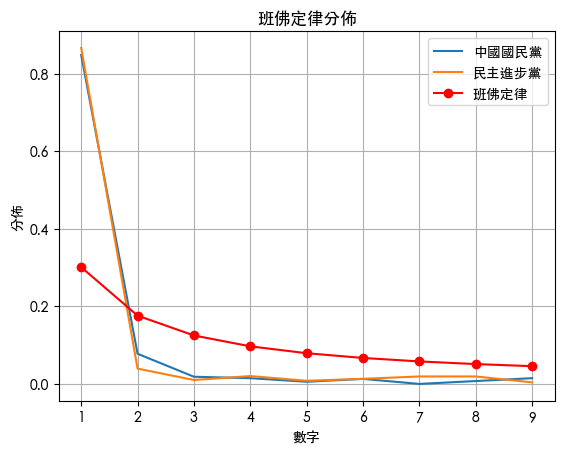

In [33]:
# 測試
df5 = plot_case(analyze_case_01, 1, 10000000,1000)

In [34]:
df5.head(5)

,候選人,收支科目,對象,支出金額,支出用途,政黨
1071,馬文君,交通旅運支出,福懋興業股份有限公司福懋埔安加油站,1000.0,油資,中國國民黨
1124,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處草屯加油站,1000.0,油資,中國國民黨
1172,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處草屯加油站,1000.0,油資,中國國民黨
1208,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處草屯加油站,1000.0,油資,中國國民黨
3008,吳思瑤,交通旅運支出,台灣中油股份有限公司油品行銷事業部台北營業處北投加油站,1000.0,油資,民主進步黨


In [35]:
print("加油站={}".format(df4[df4["對象"].str.contains('加油站')].shape[0]))
print("加油={}".format(df4[df4["對象"].str.contains('加油')].shape[0]))


加油站=5280
加油=5344


### 「對象」之關鍵字查詢

In [36]:
# 使用人機界面，查詢關鍵字
def query_keyword(txt):
    data = df4[df4["對象"].str.contains(txt)]
    print(f"原資料筆數={df4.shape[0]:,d} -> {txt}={data.shape[0]:,d} ， 其他={(df4.shape[0] - data.shape[0]):,d}")

    display(data.head(10))

In [37]:
query_keyword("加油站")

原資料筆數=13,151 -> 加油站=5,280 ， 其他=7,871


,候選人,收支科目,對象,支出金額,支出用途,政黨
1017,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處埔里加油站,50.0,油資,中國國民黨
1025,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處草屯加油站,500.0,油資,中國國民黨
1029,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處埔里中山路加油站,120.0,油資,中國國民黨
1030,馬文君,交通旅運支出,埔里加油站股份有限公司,100.0,油資,中國國民黨
1063,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處草屯加油站,500.0,油資,中國國民黨
1071,馬文君,交通旅運支出,福懋興業股份有限公司福懋埔安加油站,1000.0,油資,中國國民黨
1087,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處草屯加油站,500.0,油資,中國國民黨
1091,馬文君,交通旅運支出,久井企業股份有限公司久井日月潭加油站,1192.0,油資,中國國民黨
1106,馬文君,交通旅運支出,台灣中油股份有限公司油品行銷事業部台中營業處埔里中山路加油站,700.0,油資,中國國民黨
1107,馬文君,交通旅運支出,埔里加油站股份有限公司,690.0,油資,中國國民黨


In [38]:
text_input = widgets.Text(
    value='',  # 預設值
    placeholder='關鍵字',  # 提示文字
    description='輸入：',  # 輸入框標籤
    disabled=False  # 是否禁用
)



In [39]:
# 使用 interact 函數
widgets.interact(query_keyword, txt=text_input)


interactive(children=(Text(value='', description='輸入：', placeholder='關鍵字'), Output()), _dom_classes=('widget-i…

<function __main__.query_keyword(txt)>

### 個案02：排除「加油站」

In [40]:
# 依照金額及數字整數 100
# 排除：加油站
def analyze_case_02(amt_min, amt_max, divided):    
    data = df4[(df4["支出金額"]>=amt_min) 
               & (df4["支出金額"]<=amt_max) 
               & (df4["支出金額"] % divided == 0) 
               & (df4["對象"].str.find("加油站") == -1)]
    
    return data.copy()
    

In [41]:
# 測試
df5 = analyze_case_02(1,1250000,100)
df5.shape[0]

1917

### 動態圖表人機界面

In [42]:

# 創建 個案 選單
case_txt = {
        "個案01：金額及整數" : analyze_case_01,
        "個案02：排除加油站" : analyze_case_02,
    }

case_list = widgets.Dropdown(
    options=case_txt,        # 使用字典定義選項
    index = 0,                 # 預設 01
    description = "分析個案：",
    disabled=False
)

In [43]:
# 先統計 "支出金額" 的 min, max
df4["支出金額"].describe()

count    1.315100e+04
mean     1.738305e+03
std      1.482733e+04
min     -7.200000e+03
25%      1.700000e+02
50%      8.400000e+02
75%      1.225000e+03
max      1.241625e+06
Name: 支出金額, dtype: float64

In [44]:
df4[df4["支出金額"]<=0]

,候選人,收支科目,對象,支出金額,支出用途,政黨
26195,郭國文,交通旅運支出,台灣中油,-1000.0,油資,民主進步黨
26377,郭國文,交通旅運支出,安和路加油站,-800.0,油資,民主進步黨
36508,郭國文,交通旅運支出,國賓加油站,-1200.0,油資,民主進步黨
36509,郭國文,交通旅運支出,佳農加油站,-100.0,油資,民主進步黨
113665,葉元之,交通旅運支出,文強停車麗寶百貨,-30.0,停車費,中國國民黨
159216,孔文吉,交通旅運支出,財團法人台灣首府大學附屬機構蓮潭國際文教會館,-7200.0,差旅膳宿費用,中國國民黨
159218,孔文吉,交通旅運支出,台灣中油股份有限公司,-966.0,油資,中國國民黨
159219,孔文吉,交通旅運支出,台灣中油股份有限公司,-1327.0,油資,中國國民黨


In [45]:
# 檢查有多少筆金額為負
df4[df4["支出金額"]<=0].shape[0]

8

In [46]:
# 排除 金額 < 0，再統計一次
df4 = df4[df4["支出金額"]>0]
df4.describe()

,支出金額
count,1.314300e+04
mean,1.740324e+03
std,1.483152e+04
min,1.000000e+01
25%,1.700000e+02
50%,8.400000e+02
75%,1.225000e+03
max,1.241625e+06


In [47]:
# 金額 區間
amt1 = widgets.IntSlider(min=10, max=10000, step=1, value=1, description="金額：")
amt2 = widgets.IntSlider(min=100, max=1250000, step=1, value=1250000, description=" ")

In [48]:
# 創建 整數整除 選單
div_txt = {
        "不檢查" : 1,
        "100(佰)": 100,
        "1000(仟)" : 1000,
        "10000(萬)" : 10000,
    }

div_list = widgets.Dropdown(
    options=div_txt,        # 使用字典定義選項
    index = 0,                 # 預設 1 不檢查
    description = "整除：",
    disabled=False
)

In [49]:
# 顯示人機界面
widgets.interact(plot_case, case_func=case_list,amt_min=amt1, amt_max=amt2, divided=div_list)


interactive(children=(Dropdown(description='分析個案：', options={'個案01：金額及整數': <function analyze_case_01 at 0x3243…

<function __main__.plot_case(case_func, amt_min, amt_max, divided)>

In [50]:
df4.head(5)

,候選人,收支科目,對象,支出金額,支出用途,政黨
43,林岱樺,交通旅運支出,歐特儀股份有限公司,90.0,停車費,民主進步黨
125,林岱樺,交通旅運支出,計程車,740.0,搭乘交通工具費用,民主進步黨
188,林岱樺,交通旅運支出,高雄捷運,999.0,搭乘交通工具費用,民主進步黨
199,林岱樺,交通旅運支出,嘟嘟房,400.0,停車費,民主進步黨
393,林岱樺,交通旅運支出,歐特儀股份有限公司,45.0,停車費,民主進步黨


### 個案03：計程車

In [51]:
# 依照金額及數字整數 100
# 限：計程車
def analyze_case_03(amt_min, amt_max, divided):    
    data = df4[(df4["支出金額"]>=amt_min) 
               & (df4["支出金額"]<=amt_max) 
               & (df4["支出金額"] % divided == 0) 
               & (df4["對象"].str.find("計程車") >= 0)]
    
    return data.copy()

In [52]:
# 創建 個案 選單
case_txt = {
        "個案01：金額及整數" : analyze_case_01,
        "個案02：排除加油站" : analyze_case_02,
        "個案03：計程車" : analyze_case_03,
    }

case_list = widgets.Dropdown(
    options=case_txt,        # 使用字典定義選項
    index = 0,                 # 預設 01
    description = "分析個案：",
    disabled=False
)

In [53]:
# 顯示人機界面
widgets.interact(plot_case, case_func=case_list,amt_min=amt1, amt_max=amt2, divided=div_list)

interactive(children=(Dropdown(description='分析個案：', options={'個案01：金額及整數': <function analyze_case_01 at 0x3243…

<function __main__.plot_case(case_func, amt_min, amt_max, divided)>

## 使用自訂外部模組

### 檢視執行中的變數、函式名稱

In [54]:
[name for name in dir() if name.startswith("benford_")]


['benford_calc', 'benford_dist', 'benford_first_digit', 'benford_init']

### 刪除函式
僅為實作，平常少有此需要

In [55]:
del benford_calc
del benford_dist
del benford_first_digit
del benford_init 
[name for name in dir() if name.startswith("benford_")]

[]

In [56]:
# 此時呼叫 benford_init 會報錯
b = benford_init(['A'])

NameError: name 'benford_init' is not defined

### Jupyter Lab 新增檔案 .py
1. 於 Jupyter Lab 的檔案瀏覽視窗，滑鼠右鍵`[New File]`新增檔案   
2. 更名為 `benford.py`
3. 開啟及編輯 

### 新增函式
將上面 `benford_` 函式 `copy/paste` 到 `benford.py` 並儲存

### 載入外部 Python 模組

In [59]:
# 將 benford.py 視為模組載入
from benford import *


In [60]:
[name for name in dir() if name.startswith("benford_")]

['benford_calc', 'benford_dist', 'benford_first_digit', 'benford_init']

In [61]:
b = benford_init(['A'])
b

{'A': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}